[[ 15805.524105  14932.147655  16976.801151 ...,    289.699749
   16038.637818  19343.889099]
 [ 14932.147655  19960.826774  14139.624942 ...,    -42.221655
   15139.513508  17694.524755]
 [ 16976.801151  14139.624942  32372.338472 ...,   1520.937793
   17477.050441  25207.940358]
 ..., 
 [   289.699749    -42.221655   1520.937793 ...,   1096.487103    408.27589
    2685.069566]
 [ 16038.637818  15139.513508  17477.050441 ...,    408.27589   16336.760657
   20007.396217]
 [ 19343.889099  17694.524755  25207.940358 ...,   2685.069566
   20007.396217  34806.72494 ]]


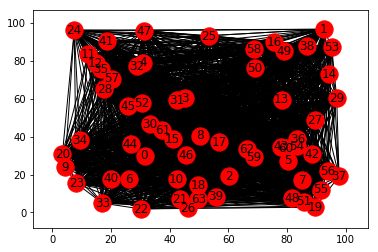

158694.051773


In [90]:
import codecs
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import pickle
import networkx as nx

class Recording:
    def __init__(self, id, type):
        self.id=id
        self.type = type
        value = 64*[255*[0]]
        
class Person:
    recordings = []
    def setName(self, id):
        self.id=id
    def setRecordings(self, recordings):
        self.recordings = recordings
    def printData(self):
        print(self.id)
        print(self.recordings)

with codecs.open('co2a0000364.rd.000', 'r', 'utf8') as file:
    rows = file.readlines()
    channels=[]
    headerCount = 0
    person = Person()
    recordingMatrix = np.zeros(shape=(64,256), dtype = np.float64)
    for row in rows:
        if '#' not in row:
             recordingMatrix[len(channels)-1][int(row.split(' ')[2])] = row.split(' ')[3]
        else:
            if(headerCount==0):
                person.setName(row.strip('#').split('.')[0])
            elif(headerCount == 3):
                recording = Recording((row.split(' ')[5]), (row.split(' ')[1] + row.split(' ')[2]))
            elif(headerCount>3):
                channels.append(row.split(' ')[1])
        headerCount+=1
    person.setRecordings(recordingMatrix)
#     person.printData()
    with open(person.id+'.pickle', "wb") as output_file:
        pickle.dump(person, output_file)
    with open(person.id+'.pickle', "rb") as input_file:
        personData = pickle.load(input_file)
#     print(personData.recordings)
    correlatedMatrix = np.zeros(shape=(64,64), dtype = np.float64)
    for i in range(0, 64):
        for j in range(0, 64):
            correlatedMatrix[i][j] = np.correlate(personData.recordings[i], personData.recordings[j])
    print(correlatedMatrix)
#   ()  G=nx.from_numpy_matrix(correlatedMatrix)
#     G.edges(data=False)
    G=nx.Graph()
    G.add_nodes_from([0,63])
    for i in range(0, 64):
        for j in range(0, 64):
            G.add_edge(i, j, r=correlatedMatrix[i][j])
    nx.draw_networkx(G, nx.random_layout(G, scale=100))
    nx.spring_layout(G,scale=200)
    plt.figure(num=None, figsize=(1000, 1000))
    plt.show()
    print(np.unravel_index(correlatedMatrix.argmax(), a.shape))
#     data = [
#         go.Surface(
#             z=recordingMatrix
#         )
#     ]
#     layout = go.Layout(
#         title='EEG Dataset',
#         autosize=False,
#         width=500,
#         height=500,
#         margin=dict(
#             l=65,
#             r=50,
#             b=65,
#             t=90
#         )
#     )
#     fig = go.Figure(data=data, layout=layout)
#     py.iplot(fig, filename=person.id)
